# Car Price Prediction Machine Learning Project using python

# About Data information
This dataset contains information about used cars.
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
The columns in the given dataset are as follows:

#feature Information

name             
year            
selling_price(lakh)  
Present_Price(lakh)
km_driven
fuel
seller_type
transmission
Owner


In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('default')
warnings.simplefilter("ignore")

# Data Acquasiton

In [2]:
df=pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
#number of row and column
print('row:',df.shape[0])
print('column:',df.shape[1])

row: 301
column: 9


In [4]:
#get some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
#geting some statistical information
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
#check uniquq vqlue in fuel_type  present column
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [7]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

# Data Preprocessing 

# Data Cleaning

In [8]:
# check missing value using null function
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# Data Exploratory analysis

In [9]:
#Cheacking data distribution of categorical data
print(df.Fuel_Type.value_counts())
print('-----------------------------------------')
print(df.Transmission.value_counts())
print('-----------------------------------------')
print(df.Seller_Type.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
-----------------------------------------
Manual       261
Automatic     40
Name: Transmission, dtype: int64
-----------------------------------------
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [10]:
#data visualization

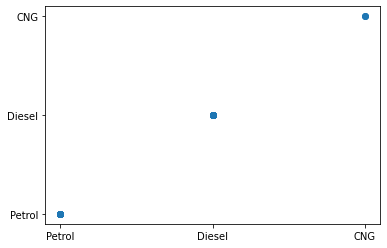

In [11]:
plt.scatter(df.Fuel_Type,df.Fuel_Type)

In [12]:
df[:2]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


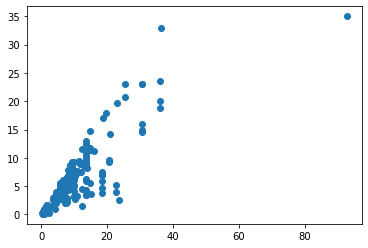

In [13]:
plt.scatter(df.Present_Price,df.Selling_Price)

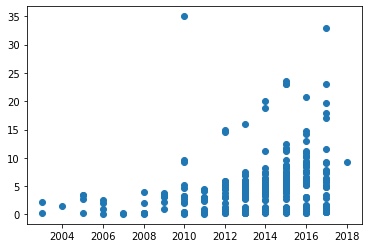

In [14]:
plt.scatter(df.Year,df.Selling_Price)

<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

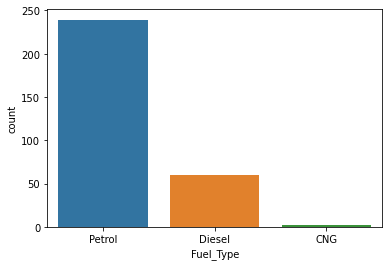

In [15]:
sns.countplot(df.Fuel_Type,)

Text(0.5, 1.0, 'price analysis')

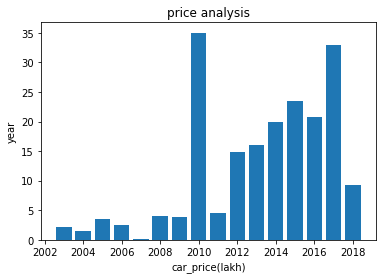

In [16]:
plt.bar(df.Year,df.Selling_Price)
plt.xlabel('car_price(lakh)')
plt.ylabel('year')
plt.title('price analysis')


Text(0.5, 1.0, 'price analysis')

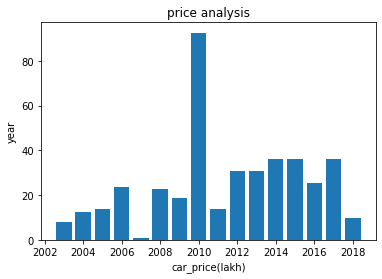

In [17]:
plt.bar(df.Year,df.Present_Price)
plt.xlabel('car_price(lakh)')
plt.ylabel('year')
plt.title('price analysis')


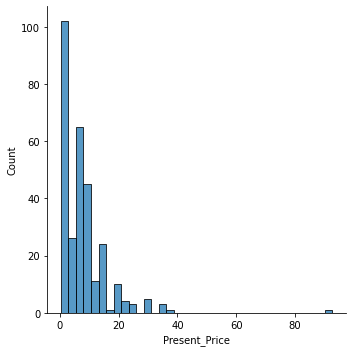

In [18]:
sns.displot(df.Present_Price)

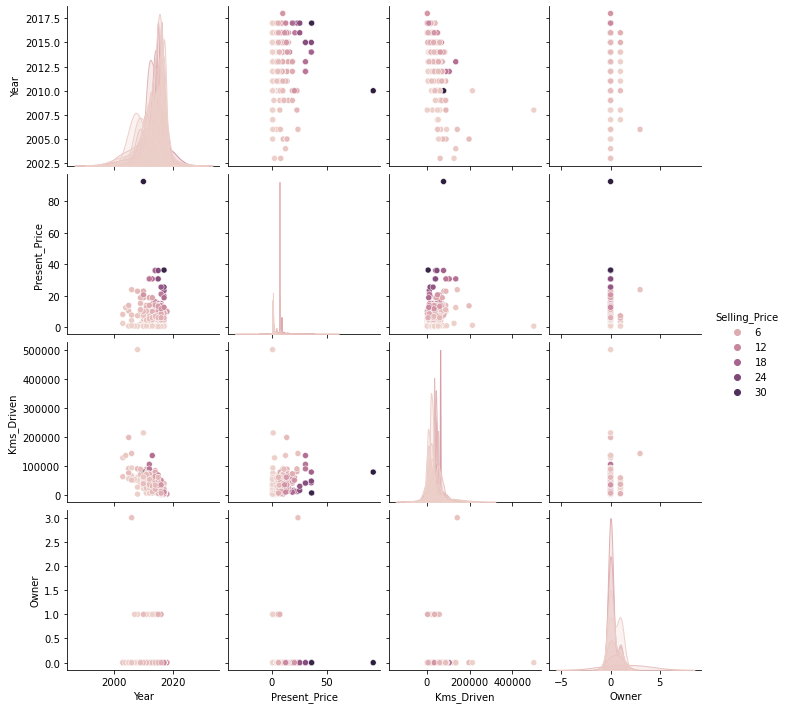

In [19]:
sns.pairplot(df,hue='Selling_Price')

# Label Encoder

In [20]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':3}},inplace=True)
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [21]:
df[:5]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [22]:
df[df['Transmission']==1].head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
12,ciaz,2015,7.50,9.94,15000,0,0,1,0
22,sx4,2011,4.40,8.01,50000,0,0,1,0
40,baleno,2016,5.85,7.87,24524,0,0,1,0
45,ciaz,2014,7.50,12.04,15000,0,0,1,0
49,ciaz,2017,7.75,9.29,37000,0,0,1,0


In [23]:
df[df['Transmission']==0].head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# Data Spliting

In [34]:
x=df.drop(['Selling_Price','Car_Name'],axis=1)
y=df.Selling_Price

In [35]:
print(x)
print(y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

# Splitting Training and testing

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15,random_state=2)

# Model Training

In [ ]:
# Linear regression module

In [90]:
from sklearn.linear_model import LinearRegression,Lasso
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

# Model Evaluation

In [72]:
training_data_prediction=lr.predict(X_train)

In [73]:
from sklearn.metrics import r2_score,accuracy_score

In [74]:
error_score=r2_score(y_train,training_data_prediction)
print('R2_ score error:',error_score)

R2_ score error: 0.8763181768826189


In [75]:
#visualize the actual price and predict price

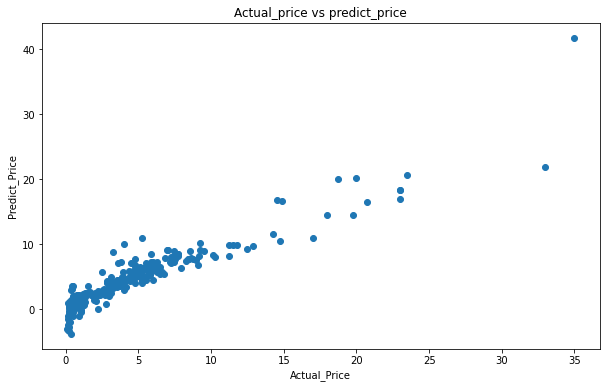

In [86]:
plt.figure(figsize=(10,6))
plt.scatter(y_train,training_data_prediction)
plt.xlabel('Actual_Price')
plt.ylabel('Predict_Price')
plt.title('Actual_price vs predict_price')
plt.show()

In [77]:
# Testing data Prediction


In [78]:
testing_data_prediction=lr.predict(X_test)

In [79]:
print('accuracy:',r2_score(y_test,testing_data_prediction))

accuracy: 0.8539440279236558


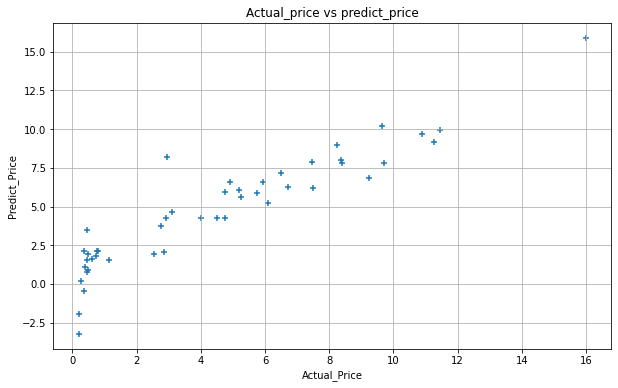

In [101]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,testing_data_prediction,marker='+')
plt.xlabel('Actual_Price')
plt.ylabel('Predict_Price')
plt.title('Actual_price vs predict_price')
plt.grid(abs)
plt.show()

In [87]:
lr.coef_

array([ 4.19429936e-01,  4.40681790e-01, -5.97370120e-06,  1.60634552e+00,
       -1.01842528e+00,  1.50808789e+00, -8.67562892e-01])

In [88]:
lr.intercept_

-843.1806291277071

# Lasso Regression Module

In [91]:
lasso_reg=Lasso()
lasso_reg.fit(X_train,y_train)

Lasso()

In [92]:
# Prediction of data

In [94]:
lasso_predict=lasso_reg.predict(X_test)
lasso_predict

array([ 9.81195983,  1.41737861,  4.32032746,  3.14802505,  8.93161792,
        4.27694627,  3.70220531,  5.65418205,  0.89981991,  5.2461391 ,
        6.45770186,  4.38365942,  1.28844272,  8.24637221,  1.97335867,
        2.32979296,  2.56925507,  2.36477968,  7.96054831,  4.18217186,
        2.32371547,  7.84716698,  2.03167549,  8.55804786,  1.54453006,
        6.47686939,  2.1239378 , -1.24348568,  4.01873433,  2.17536708,
        2.43281493,  3.56391408,  5.59997156,  8.26777577, -0.88141131,
        5.25236473,  6.49864062,  5.7410622 ,  6.39939378,  4.75621301,
       15.46067618,  2.62243161,  1.68175926,  0.4349482 ,  5.13740368,
        6.8780233 ])

In [96]:
np.array(y_test)

array([ 9.65,  0.45,  4.75,  3.1 , 11.45,  4.5 ,  2.95,  6.5 ,  0.27,
        6.1 ,  6.7 ,  4.75,  0.35,  8.4 ,  2.55,  0.72,  0.75,  0.48,
       11.25,  4.  ,  1.15,  8.25,  0.45, 10.9 ,  0.5 ,  7.45,  0.6 ,
        0.2 ,  2.9 ,  2.85,  0.45,  2.75,  5.25,  9.7 ,  0.2 ,  5.95,
        8.35,  5.75,  7.5 ,  5.2 , 16.  ,  0.8 ,  0.4 ,  0.35,  4.9 ,
        9.25])

In [97]:
#r2 score Lasso regression
print('r2_score',r2_score(y_test,lasso_predict))

r2_score 0.8940142482159172


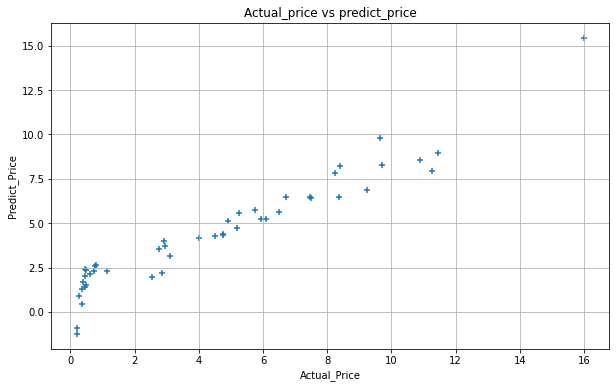

In [100]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,lasso_predict,marker='+')
plt.xlabel('Actual_Price')
plt.ylabel('Predict_Price')
plt.title('Actual_price vs predict_price')
plt.grid()
plt.show()